In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:\\Users\\Arnold\\Desktop\\zz_60min_inNums.csv")

In [4]:
df.head()

,startTime,Hours,Is_weekend,121,123,125,127,129,131,133,...,141,143,145,147,149,151,153,155,157,159
0,2015/1/2 6:00,0.250000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015/1/2 7:00,0.291667,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015/1/2 8:00,0.333333,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015/1/2 9:00,0.375000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015/1/2 10:00,0.416667,1,298,0,126,102,44,116,172,...,186,114,68,42,86,48,84,260,0,0


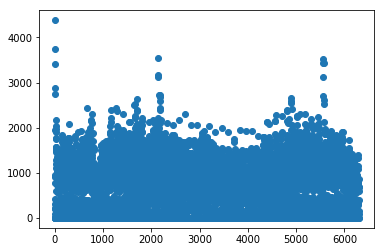

In [9]:
plt.figure()
plt.scatter([i for i in range(len(df.loc[:,"121"].values))],df.loc[:,"121"].values)

In [6]:
df.describe()

,Hours,Is_weekend,121,123,125,127,129,131,133,135,...,141,143,145,147,149,151,153,155,157,159
count,6300.000000,6300.0,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,...,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000
mean,0.604167,1.0,809.286190,293.317460,560.830794,597.894444,394.598889,464.900159,581.685556,1260.388730,...,961.285714,600.757778,571.131905,676.625556,502.720952,412.628413,508.445397,1072.676667,18.866349,926.846508
std,0.216189,0.0,543.123775,253.318195,402.750996,439.334957,231.138186,339.059704,357.195860,696.243744,...,559.573738,328.469914,344.812902,594.033212,310.866033,322.860303,349.404095,705.695117,23.201901,741.819414
min,0.250000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.416667,1.0,381.000000,155.000000,334.000000,357.000000,238.000000,248.000000,295.000000,858.000000,...,580.750000,428.000000,376.000000,323.750000,298.000000,227.000000,274.000000,437.000000,10.000000,419.000000
50%,0.604167,1.0,795.000000,247.000000,515.000000,525.000000,414.000000,426.000000,608.000000,1246.000000,...,983.000000,602.000000,562.000000,572.500000,512.500000,391.000000,499.000000,1162.500000,16.000000,861.000000
75%,0.791667,1.0,1166.000000,360.000000,688.250000,738.000000,506.000000,587.000000,761.000000,1668.250000,...,1255.000000,781.000000,723.000000,828.000000,663.000000,504.000000,624.000000,1536.250000,23.000000,1209.000000
max,0.958333,1.0,4380.000000,2012.000000,2780.000000,3817.000000,1950.000000,2742.000000,2478.000000,5006.000000,...,4328.000000,2690.000000,2694.000000,5377.000000,2031.000000,2511.000000,2281.000000,4818.000000,570.000000,6528.000000


In [13]:
np.percentile(df.loc[:,"121"].values,96)

1764.0

In [14]:
arry=df.loc[:,"121"].values

In [16]:
arry[arry>1764]=arry.mean()

In [18]:
len(arry)

6300

In [26]:
y=arry
x=np.arange(1,6301)

In [40]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [41]:
X=x[:5500]
X_test=x[5500:]
y_test=y[5500:]
y=y[:5500]

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

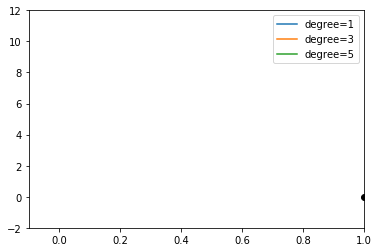

In [43]:
axis = plt.axis()
plt.scatter(X,y,color='black')
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test, y_test, label='degree={0}'.format(degree))
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc='best');

In [48]:
y_pre = PolynomialRegression(20).fit(X, y).predict(X_test)

In [58]:
y_pre = PolynomialRegression(30).fit(X, y).predict(X)

In [59]:
np.fabs(y_pre-y).mean()

379.42764358598674

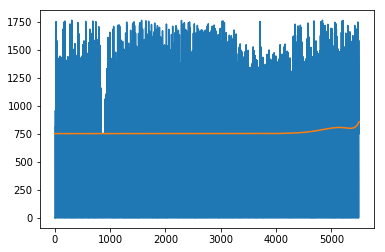

In [60]:
plt.figure()
plt.plot(x[:5500],y)
plt.plot(x[:5500],y_pre)